### EDA and ML Pipeline

### Import 

In [45]:
import os
import pandas as pd
os.getcwd()

'/'

In [46]:
""""
import subprocess
from pathlib import Path
import pandas as pd

try:
    repo_root = subprocess.run(
        ["git", "rev-parse", "--show-toplevel"],
        capture_output=True,
        text=True,
        check=True
    ).stdout.strip()
except subprocess.CalledProcessError:
    repo_root = Path.cwd()  # fallback if not in a git repo

csv_path = Path(repo_root) / "FullSimDF.csv"
dog_dat = pd.read_csv(csv_path)

"""

'"\nimport subprocess\nfrom pathlib import Path\nimport pandas as pd\n\ntry:\n    repo_root = subprocess.run(\n        ["git", "rev-parse", "--show-toplevel"],\n        capture_output=True,\n        text=True,\n        check=True\n    ).stdout.strip()\nexcept subprocess.CalledProcessError:\n    repo_root = Path.cwd()  # fallback if not in a git repo\n\ncsv_path = Path(repo_root) / "FullSimDF.csv"\ndog_dat = pd.read_csv(csv_path)\n\n'

In [47]:
dog_dat = pd.read_csv("/Users/ellawileman/Documents/fall2025/VIPR/CoolDawgs_PersonalizationGrp/FullSimDF.csv")
dog_dat.head()

,Breed,Age,Weight,Gender,Color,Coat Length,Coat Type,is_brachycephalic,Energy Level,Playfulness Level,...,Hum_Diff,CBT_simulated,is_old,is_overweight,heat_stress_risk,High_humidity_fordogs,prior_heat_related_injury_est,simulated_heat_injury_flag,target2Category,target3Category
0,Yorkshire Terrier,9.6,25.3,Male,Tricolor,Long,Silky,0.0,3.543823,1.930809,...,12.99,40.511511,0,0,0,1,0.002,0,1,Heat Stress
1,Poodle,4.3,43.6,Female,Gray,Long,Curly,0.0,2.856352,1.334560,...,11.75,38.406988,0,1,1,1,0.052,0,0,Normal
2,French Bulldog,3.5,33.3,Male,Cream,Short,Smooth,1.0,3.588762,4.748225,...,2.55,39.389887,0,0,1,0,0.052,0,0,Normal
3,Pembroke Welsh Corgi,6.4,49.6,Female,Cream,Short,Double,0.0,3.507116,4.176902,...,3.26,38.831824,0,1,1,0,0.052,0,0,Normal
4,Weimaraner,3.0,59.7,Male,Brown,Short,Smooth,0.0,3.832747,3.935919,...,3.96,39.439888,0,1,1,0,0.052,0,0,Normal


In [48]:
# column names
dog_dat.columns

Index(['Breed', 'Age', 'Weight', 'Gender', 'Color', 'Coat Length', 'Coat Type',
       'is_brachycephalic', 'Energy Level', 'Playfulness Level',
       'size_category', 'Spayed/Neutered', 'Indoor/Outdoor', 'Season',
       'Sun Exposure', 'Wind Cooling Effect', 'Station_Temp',
       'Station_Humidity', 'Ambient_Temp', 'Ambient_Humidity', 'T_device',
       'H_device', 'breed_wt_mu', 'breed_wt_sd', 'ideal_weight',
       'pct_of_ideal', 'BCS_cont', 'BCS', 'Temp_Diff', 'Hum_Diff',
       'CBT_simulated', 'is_old', 'is_overweight', 'heat_stress_risk',
       'High_humidity_fordogs', 'prior_heat_related_injury_est',
       'simulated_heat_injury_flag', 'target2Category', 'target3Category'],
      dtype='object')

## EDA

In [49]:
import matplotlib.pyplot as plt

### Univariate

(array([3.000e+00, 3.000e+00, 9.000e+00, 5.800e+01, 1.490e+02, 2.530e+02,
        5.840e+02, 8.620e+02, 1.234e+03, 1.431e+03, 1.512e+03, 1.287e+03,
        9.330e+02, 5.660e+02, 2.940e+02, 1.200e+02, 4.600e+01, 1.700e+01,
        4.000e+00, 1.000e+00]),
 array([-8.9 , -7.27, -5.64, -4.01, -2.38, -0.75,  0.88,  2.51,  4.14,
         5.77,  7.4 ,  9.03, 10.66, 12.29, 13.92, 15.55, 17.18, 18.81,
        20.44, 22.07, 23.7 ]),
 <BarContainer object of 20 artists>)

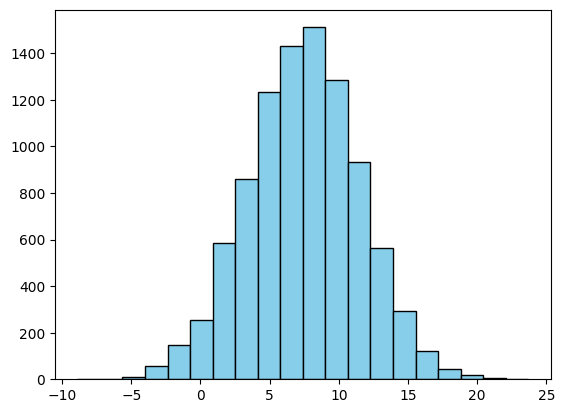

In [50]:
# Ella
plt.hist(dog_dat['Age'], bins=20, color='skyblue', edgecolor='black')
# Age is normally distributed about 7 years

### Bivariate

/var/folders/yz/btvl331d4g54624wdzgx_2hc0000gn/T/ipykernel_16263/2035708879.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=cats, patch_artist=True)


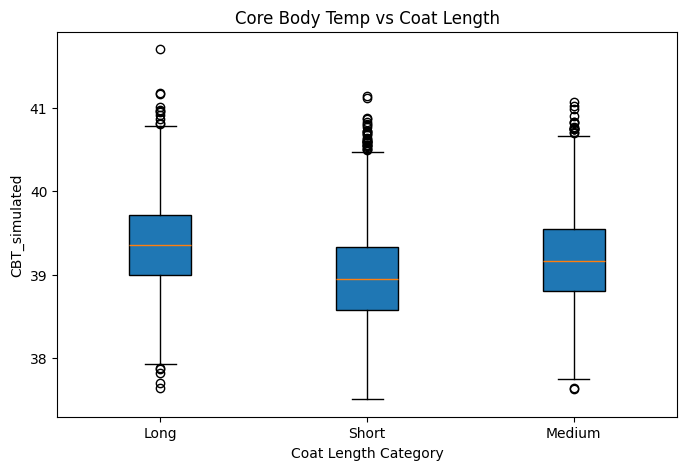

In [54]:
# Ella
cats = dog_dat['Coat Length'].unique()

# Create a list of CBT_simulated arrays, one per coat length category
data = [dog_dat.loc[dog_dat['Coat Length'] == c, 'CBT_simulated'] for c in cats]

plt.figure(figsize=(8,5))
plt.boxplot(data, labels=cats, patch_artist=True)
plt.ylabel("CBT_simulated")
plt.xlabel("Coat Length Category")
plt.title("Core Body Temp vs Coat Length")
plt.show()# No clear correlation between coat length and CBT, looks like short and medium tend to have slightly lower 
# minimums of CBT but not by much

### Model-Agnostic Feature Selection

In [ ]:
# Correlation Filtering? 

## Predicting CBT and "Heat Stress" Label

In [58]:
dog_dat['target3Category'].value_counts()

target3Category
Normal         8295
Heat Stress    1026
Heat Stroke      45
Name: count, dtype: int64

In [59]:
# Drop the target columns from X, and core body temp
X = dog_dat.drop(columns=['target2Category', 'target3Category', 'CBT_simulated'])
# Assume X is your feature set without targets
numeric_features = X.select_dtypes(include=['int64', 'float64'])
categorical_features = X.select_dtypes(include=['object', 'category'])
# One-hot encode categorical features
X_cat_encoded = pd.get_dummies(categorical_features, drop_first=True)
X_encoded = pd.concat([numeric_features, X_cat_encoded], axis=1)




# Binary target
y2 = dog_dat['target2Category']
label_map_binary = {"Normal": 0, "Heat Stress": 1}
y2_num = y2.map(label_map_binary)

# 3-class target
y3 = dog_dat['target3Category']
ordered_levels = ["Normal", "Heat Stress", "Heat Stroke"]
y3_cat = pd.Categorical(y3, categories=ordered_levels, ordered=True)
label_map_3class = {"Normal": 0, "Heat Stress": 1, "Heat Stroke": 2}
y3_num = y3.map(label_map_3class)

y_cbt = dog_dat['CBT_simulated']


#### Train test split

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, _, _ = train_test_split(
    X_encoded, y2, test_size=0.2, random_state=42, stratify=y2
) # split samples once

y_train_2class = y2.loc[X_train.index]
y_test_2class = y2.loc[X_test.index]

y_train_3class = y3_num.loc[X_train.index]
y_test_3class = y3_num.loc[X_test.index]

y_train_continuous = y_cbt.loc[X_train.index]
y_test_continuous = y_cbt.loc[X_test.index]

### Testing Regression Models 

### Using Binary Target Class (2-class)

In [63]:
# SMOTE for balancing classes (only to training)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X2_train_res, y2_train_res = smote.fit_resample(X_train, y_train_2class)
print("Original class distribution:\n", y_train_2class.value_counts())
print("After SMOTE:\n", y2_train_res.value_counts())


Original class distribution:
 target2Category
0    6635
1     857
Name: count, dtype: int64
After SMOTE:
 target2Category
0    6635
1    6635
Name: count, dtype: int64


### Using Three Class Target 

In [64]:
# SMOTE with 3 classes (training only)
smote3 = SMOTE(random_state=42, sampling_strategy='not majority' )
X3_train_res, y3_train_res = smote3.fit_resample(X_train, y_train_3class)
print("Original class distribution:\n", y_train_3class.value_counts())
print("After SMOTE:\n", y3_train_res.value_counts())

Original class distribution:
 target3Category
0    6635
1     825
2      32
Name: count, dtype: int64
After SMOTE:
 target3Category
0    6635
1    6635
2    6635
Name: count, dtype: int64


In [65]:
y_test_3class.value_counts()

target3Category
0    1660
1     201
2      13
Name: count, dtype: int64

Now we are ready to fit ML models below (Use 2-class training and testing or 3-class training and testing) 
-  If you want to use a BINARY CLASSIFIER MODEL: X2_train_res, X2_test, y2_train_res, y2_test
- If you want to use a MULTI-CLASS CLASSIFIER MODEL: X3_train_res, X3_test, y3_train_res, y3_test

**Basic Steps**
- 1. Fit model on training
- 2. Predict on testing
- 3. Show classification report

**Extra:** 
- 4. Choose most important features (above a threshold) for new subset of features
- 5. Retrain on only that subset
- 6. Grid search 
- 7. Predict on testing
- 8. Show classification report


In [66]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance

In [67]:
# Ella

# XGBOOST for 2-class target
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X2_train_res, y2_train_res)
y2_pred = xgb_model.predict(X_test)
y2_proba = xgb_model.predict_proba(X_test)

# step 4: permutation importance
# permutation importance works on any model type

perm_importance = permutation_importance(xgb_model, X_test, y_test_2class, n_repeats=10, random_state=42, scoring = "recall")

perm_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values(by='importance_mean', ascending=False)

print("Top 20 features by permutation importance:")
print(perm_df.head(20))

Top 20 features by permutation importance:
                     feature  importance_mean  importance_std
12                  T_device         0.146262        0.005929
10              Ambient_Temp         0.117290        0.006756
20                 Temp_Diff         0.091589        0.008147
102            Season_Summer         0.075234        0.019543
21                  Hum_Diff         0.031308        0.006625
77                Color_Blue         0.012150        0.005204
11          Ambient_Humidity         0.011215        0.006339
74               Color_Black         0.009813        0.007071
16              ideal_weight         0.009346        0.006608
7        Wind Cooling Effect         0.006075        0.005549
87            Color_Tricolor         0.005607        0.004074
84               Color_Sable         0.005607        0.007477
3               Energy Level         0.004673        0.009109
43    Breed_Chinese Shar-Pei         0.004206        0.001402
49    Breed_Golden Retrieve

In [ ]:
selected_features = perm_df[perm_df['importance_mean'] > 0]['feature'].tolist()

# Reduce training and test sets to selected features
X2_train_sel = X2_train_res[selected_features]
X2_test_sel = X_test[selected_features]

print(f"Number of features selected: {len(selected_features)}")

# Step 6: retrain on selected features

xgb_model_sel = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model_sel.fit(X2_train_sel, y2_train_res)
y2_pred_sel = xgb_model_sel.predict(X2_test_sel)
y2_proba_sel = xgb_model_sel.predict_proba(X2_test_sel)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification report after feature selection:")
print(classification_report(y_test_2class, y2_pred_sel))
print("Confusion matrix:")
print(confusion_matrix(y_test_2class, y2_pred_sel))

Number of features selected: 27
Classification report after feature selection:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1660
           1       0.36      0.45      0.40       214

    accuracy                           0.84      1874
   macro avg       0.64      0.67      0.65      1874
weighted avg       0.86      0.84      0.85      1874

Confusion matrix:
[[1487  173]
 [ 118   96]]


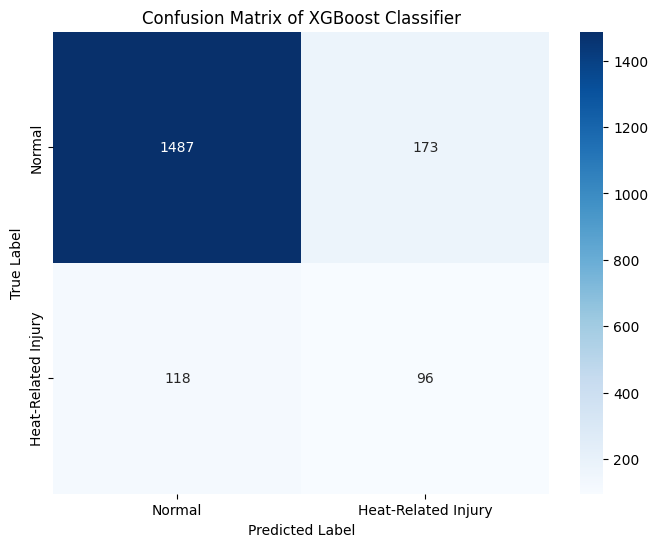

In [69]:
import seaborn as sns
cm = confusion_matrix(y_test_2class, y2_pred_sel)
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Heat-Related Injury'], # Replace with your class labels
                yticklabels=['Normal', 'Heat-Related Injury']) # Replace with your class labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of XGBoost Classifier')
plt.show()

In [70]:
# Try on 3-class target
from xgboost import XGBClassifier

xgb_model_3 = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',   # IMPORTANT
    num_class=3,                  # IMPORTANT
    random_state=42
)
xgb_model_3.fit(X3_train_res, y3_train_res)
y3_pred = xgb_model_3.predict(X_test)

perm_importance_3 = permutation_importance(
    xgb_model_3, 
    X_test, 
    y_test_3class, 
    n_repeats=10, 
    random_state=42,
    scoring='accuracy'  # Can also use 'f1_weighted' for multi-class
)


In [71]:
perm_df_3 = pd.DataFrame({
    'feature': X_test.columns,
    'importance_mean': perm_importance_3.importances_mean,
    'importance_std': perm_importance_3.importances_std
}).sort_values(by='importance_mean', ascending=False)

print("Top 20 features by permutation importance (3-class):")
print(perm_df_3.head(20))

# Keep features with mean importance > 0
selected_features_3 = perm_df_3[perm_df_3['importance_mean'] > 0]['feature'].tolist()

# Reduce training and test sets to selected features
X3_train_sel = X3_train_res[selected_features_3]
X3_test_sel = X_test[selected_features_3]

print(f"Number of features selected (3-class): {len(selected_features_3)}")

# Retrain on selected features
xgb_model_3_sel = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',
    num_class=3,
    random_state=42
)
xgb_model_3_sel.fit(X3_train_sel, y3_train_res)
y3_pred_sel = xgb_model_3_sel.predict(X3_test_sel)

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix (3-class):")
print(confusion_matrix(y_test_3class, y3_pred_sel))

Top 20 features by permutation importance (3-class):
                           feature  importance_mean  importance_std
91                Coat Type_Double         0.063661        0.004302
92                 Coat Type_Silky         0.051067        0.003659
90               Coat Length_Short         0.030470        0.003623
93                Coat Type_Smooth         0.027962        0.003393
102                  Season_Summer         0.022892        0.004384
101                  Season_Spring         0.015155        0.002733
15                     breed_wt_sd         0.010459        0.001773
89              Coat Length_Medium         0.009285        0.002572
14                     breed_wt_mu         0.008645        0.002299
61                    Breed_Poodle         0.006884        0.001460
74                     Color_Black         0.005016        0.000961
5                  Spayed/Neutered         0.003469        0.001928
96             size_category_Large         0.003202        0.00

In [72]:
print("Classification report after feature selection (3-class):")
print(classification_report(y_test_3class, y3_pred_sel))

Classification report after feature selection (3-class):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1660
           1       0.43      0.22      0.30       201
           2       0.07      0.08      0.07        13

    accuracy                           0.88      1874
   macro avg       0.47      0.42      0.44      1874
weighted avg       0.86      0.88      0.86      1874



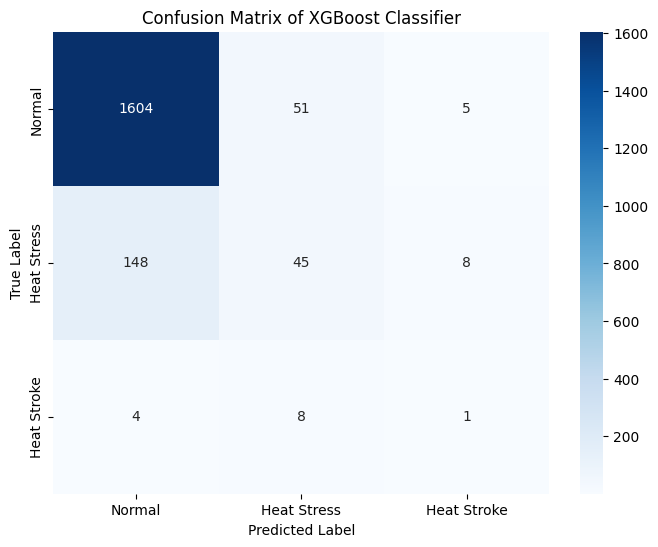

In [73]:
import seaborn as sns
cm = confusion_matrix(y_test_3class, y3_pred_sel)
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Heat Stress', 'Heat Stroke'], # Replace with your class labels
                yticklabels=['Normal', 'Heat Stress', 'Heat Stroke']) # Replace with your class labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of XGBoost Classifier')
plt.show()
